DECISION TREE
1. Data Preparation:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
data=pd.read_excel('https://raw.githubusercontent.com/ygtech27/Datasets/refs/heads/main/heart_disease.xlsx',sheet_name='Heart_disease')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


2. Exploratory Data Analysis (EDA):


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [5]:
data['oldpeak']=data['oldpeak'].fillna(data['oldpeak'].median())
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


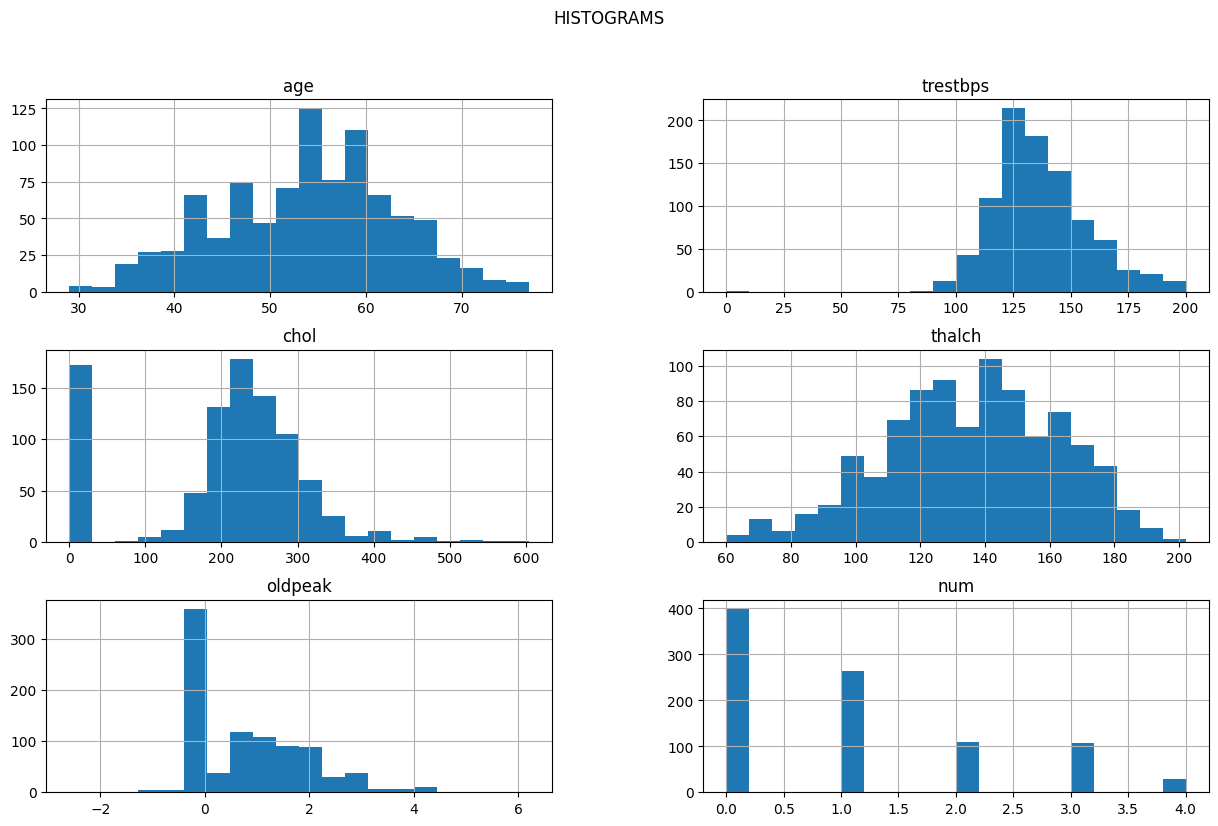

In [7]:
data.isnull().sum()
data.hist(bins=20,figsize=(15,9))
plt.suptitle("HISTOGRAMS")
plt.show()

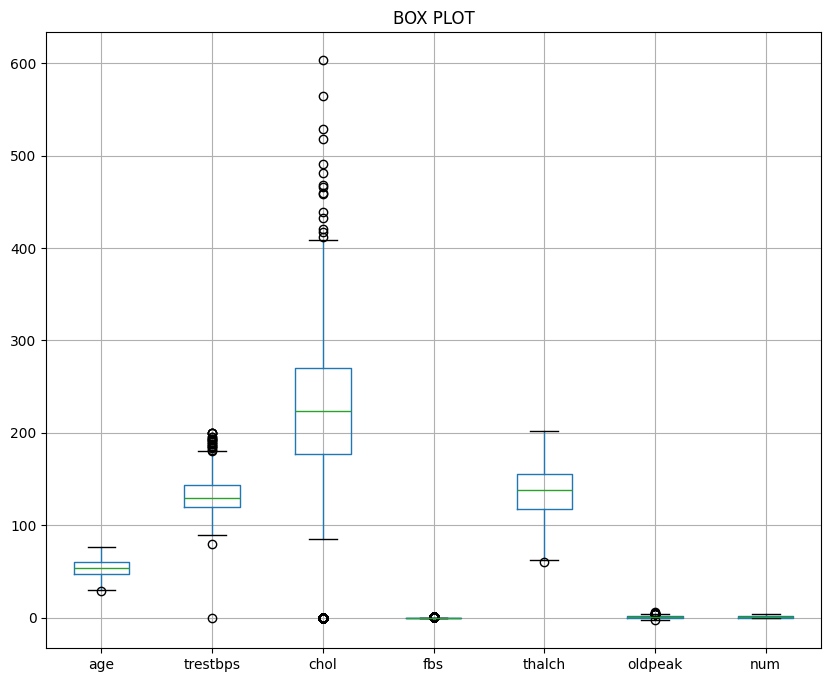

In [8]:
plt.figure(figsize=(10,8))
data.boxplot()
plt.title('BOX PLOT')
plt.show()

3. Feature Engineering:

In [10]:
#converting bool to int
data['fbs'] = data['fbs'].astype(int)
data
data.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,int64
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [11]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype(str)
data.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,int64
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [12]:
from sklearn.preprocessing import LabelEncoder
categorical_val=data.select_dtypes(include='object').columns
label=LabelEncoder()
for col in categorical_val:
    data[col]=label.fit_transform(data[col])
data.rename(columns={'num':'target'},inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.5,2,2,4
904,62,1,0,166,170,0,2,120,3,3.0,1,2,4
905,56,1,2,170,0,0,0,123,3,2.5,0,1,4
906,56,1,2,144,208,1,2,105,2,0.5,0,0,4


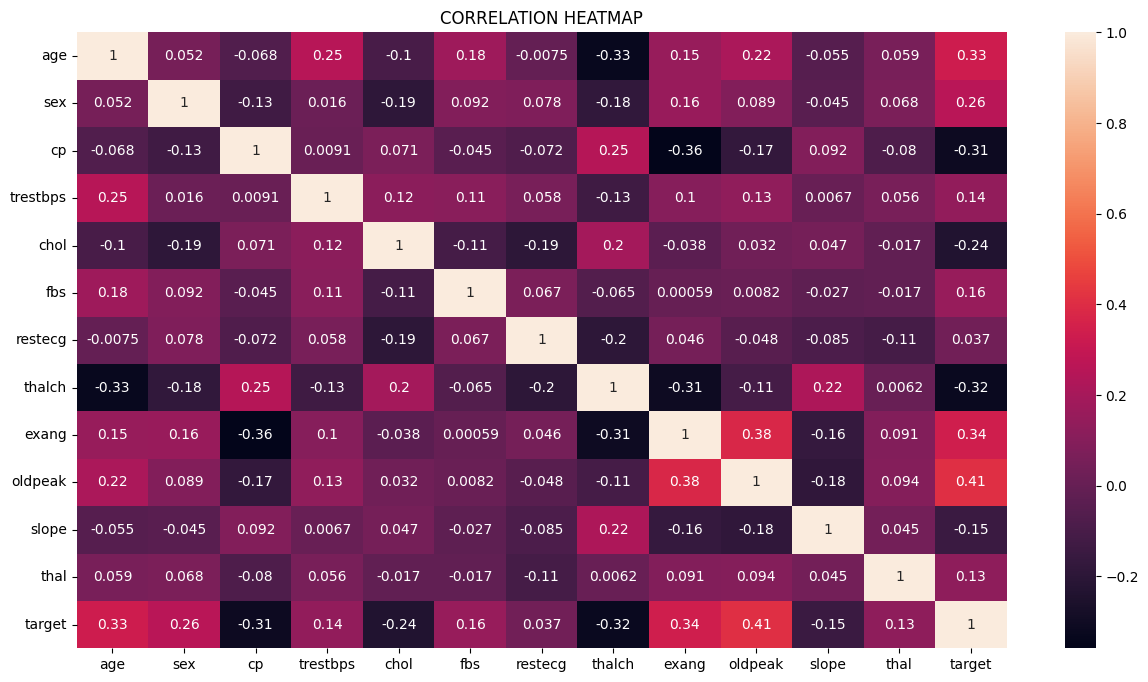

In [13]:
corrlaton_matrix=data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrlaton_matrix,annot=True)
plt.title('CORRELATION HEATMAP')
plt.show()

Task-4.Decision Tree Classification:

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
x=data.drop('target',axis=1)
y=data['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.90      0.73       122
           1       0.49      0.41      0.45        82
           2       0.29      0.15      0.20        34
           3       0.40      0.07      0.12        28
           4       0.00      0.00      0.00         7

    accuracy                           0.55       273
   macro avg       0.36      0.31      0.30       273
weighted avg       0.50      0.55      0.50       273



Task-5. Hyperparameter Tuning:


In [17]:
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7],'splitter':['random','best']}
grid=GridSearchCV(model,params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'splitter': ['random', 'best']})

In [20]:
grid.best_params_

model2=DecisionTreeClassifier(criterion='gini',max_depth=3,splitter='random')
model2.fit(x_train,y_train)

y_pred1=model2.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75       122
           1       0.39      0.63      0.48        82
           2       0.14      0.03      0.05        34
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00         7

    accuracy                           0.54       273
   macro avg       0.25      0.29      0.26       273
weighted avg       0.45      0.54      0.48       273



Task-6. Model Evaluation and Analysis:


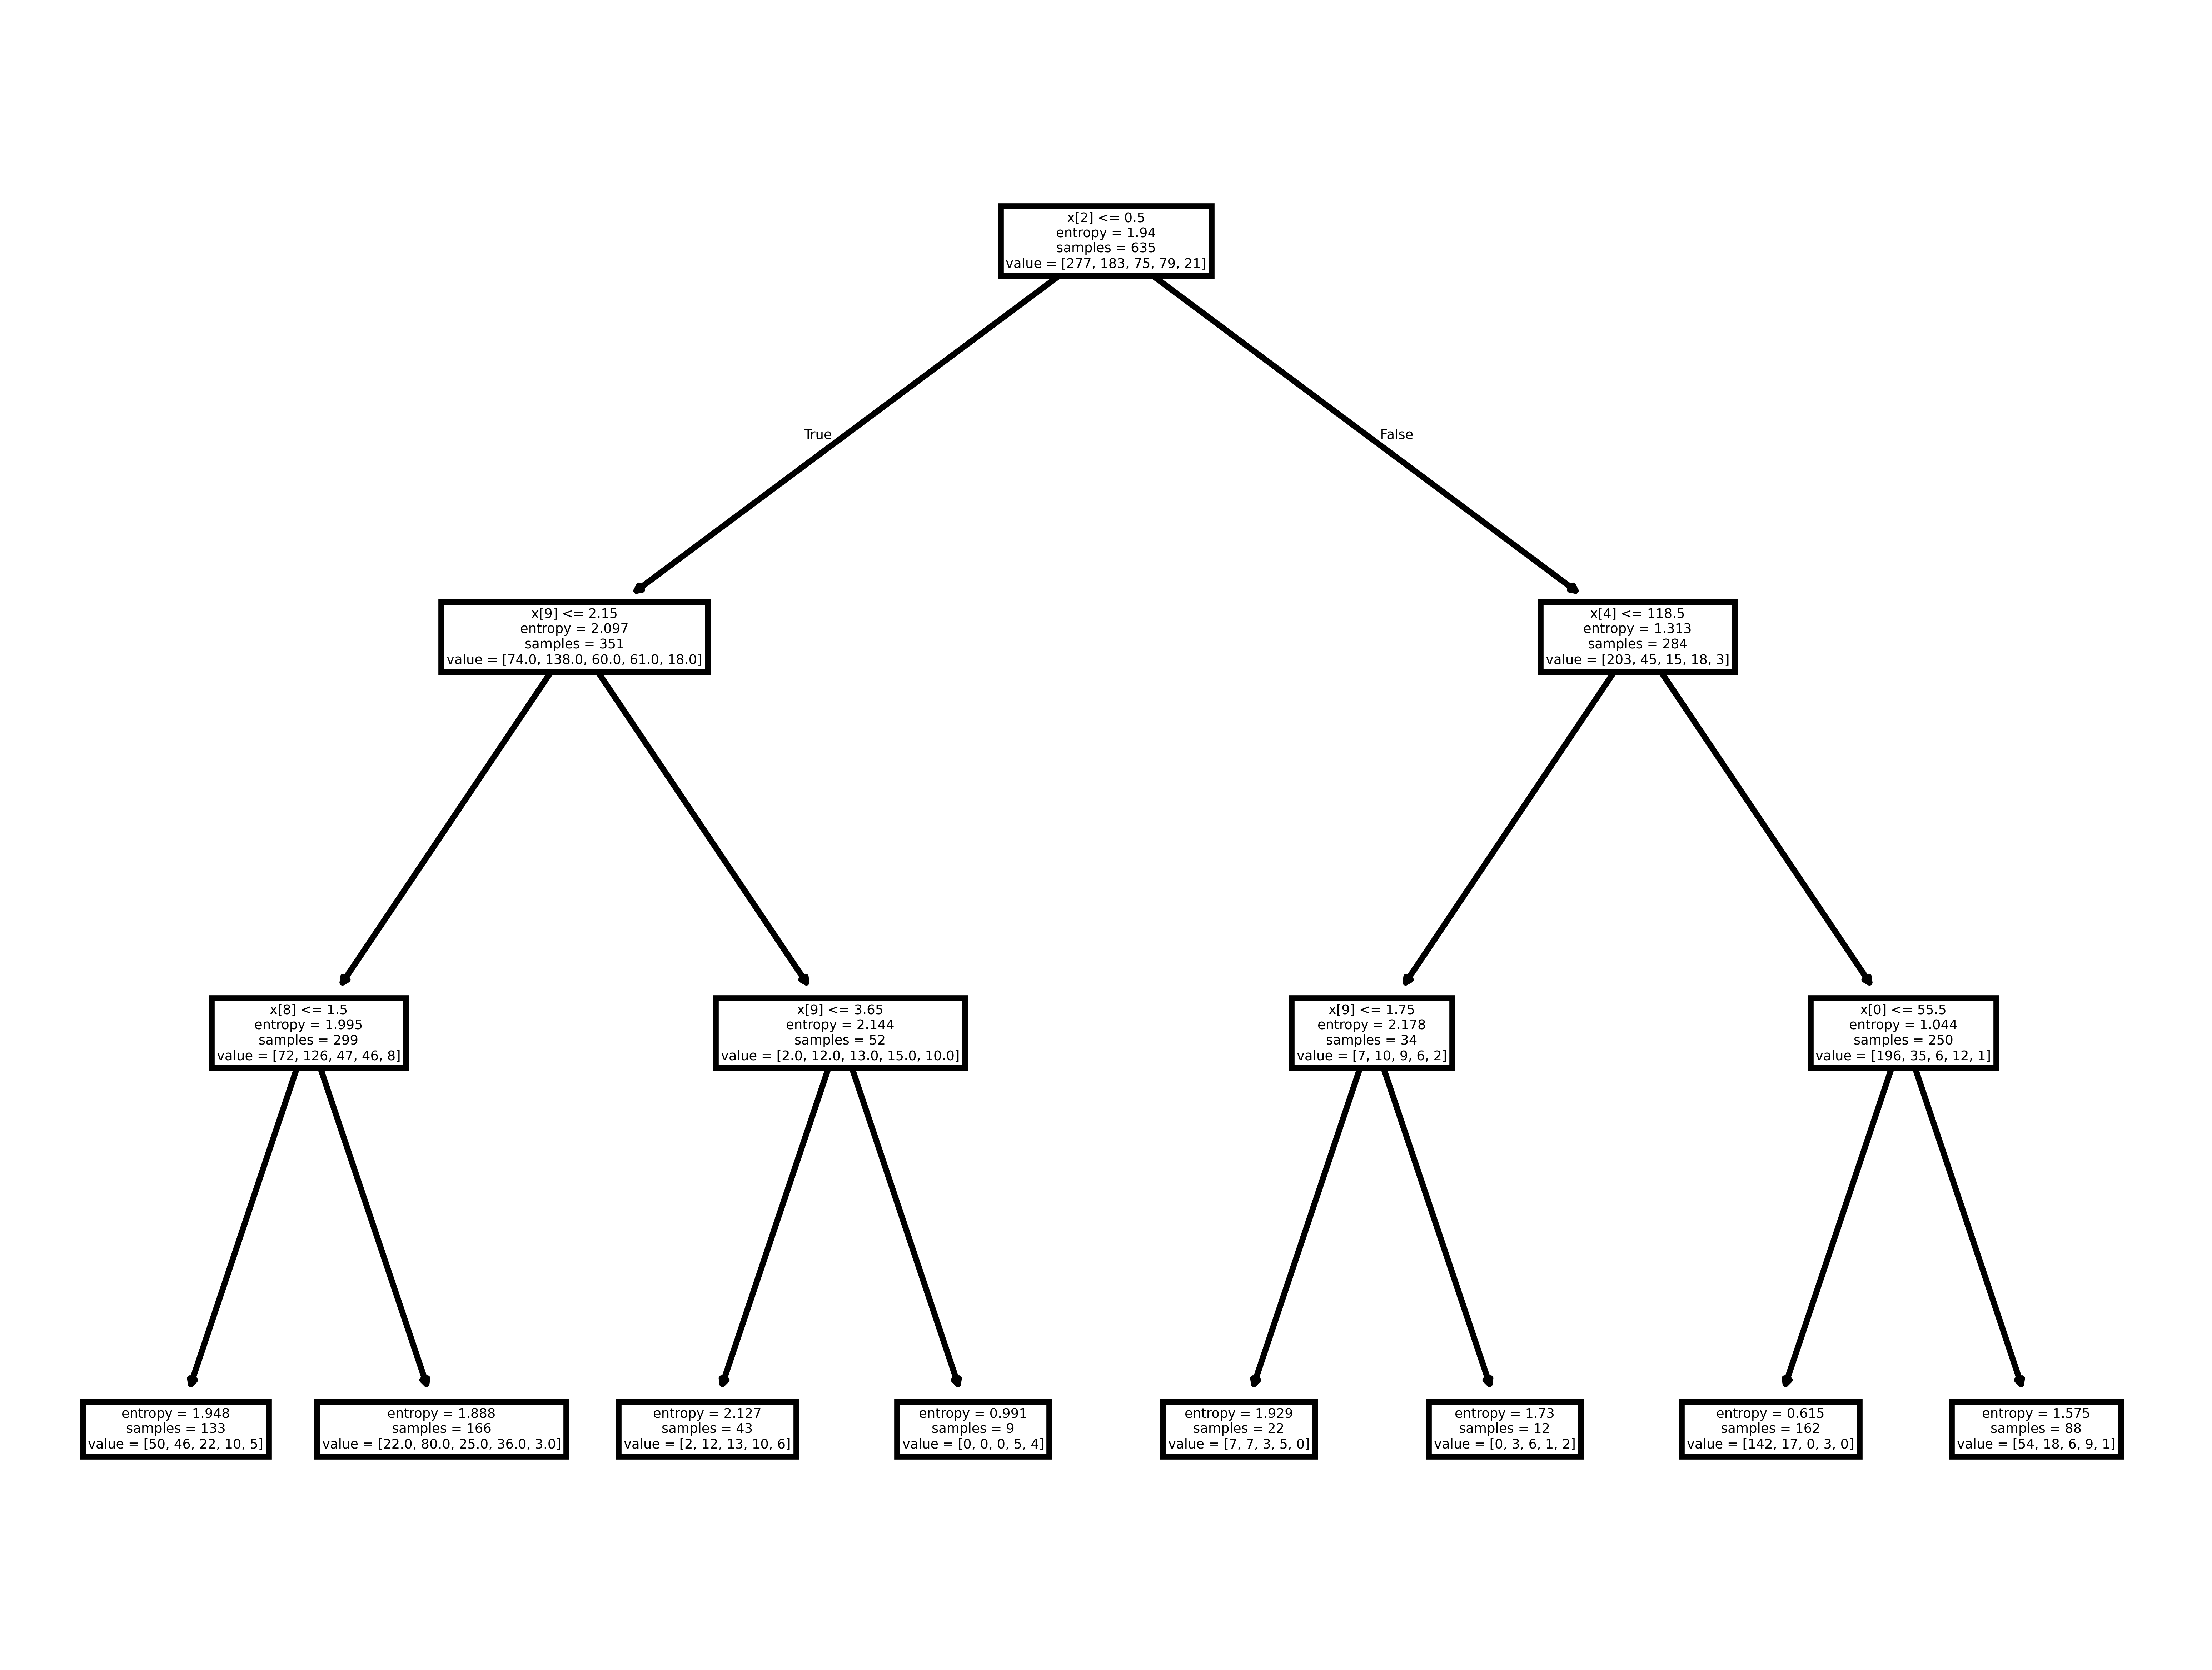

In [21]:
plt.figure(dpi=1200)
tree.plot_tree(model)
plt.show()

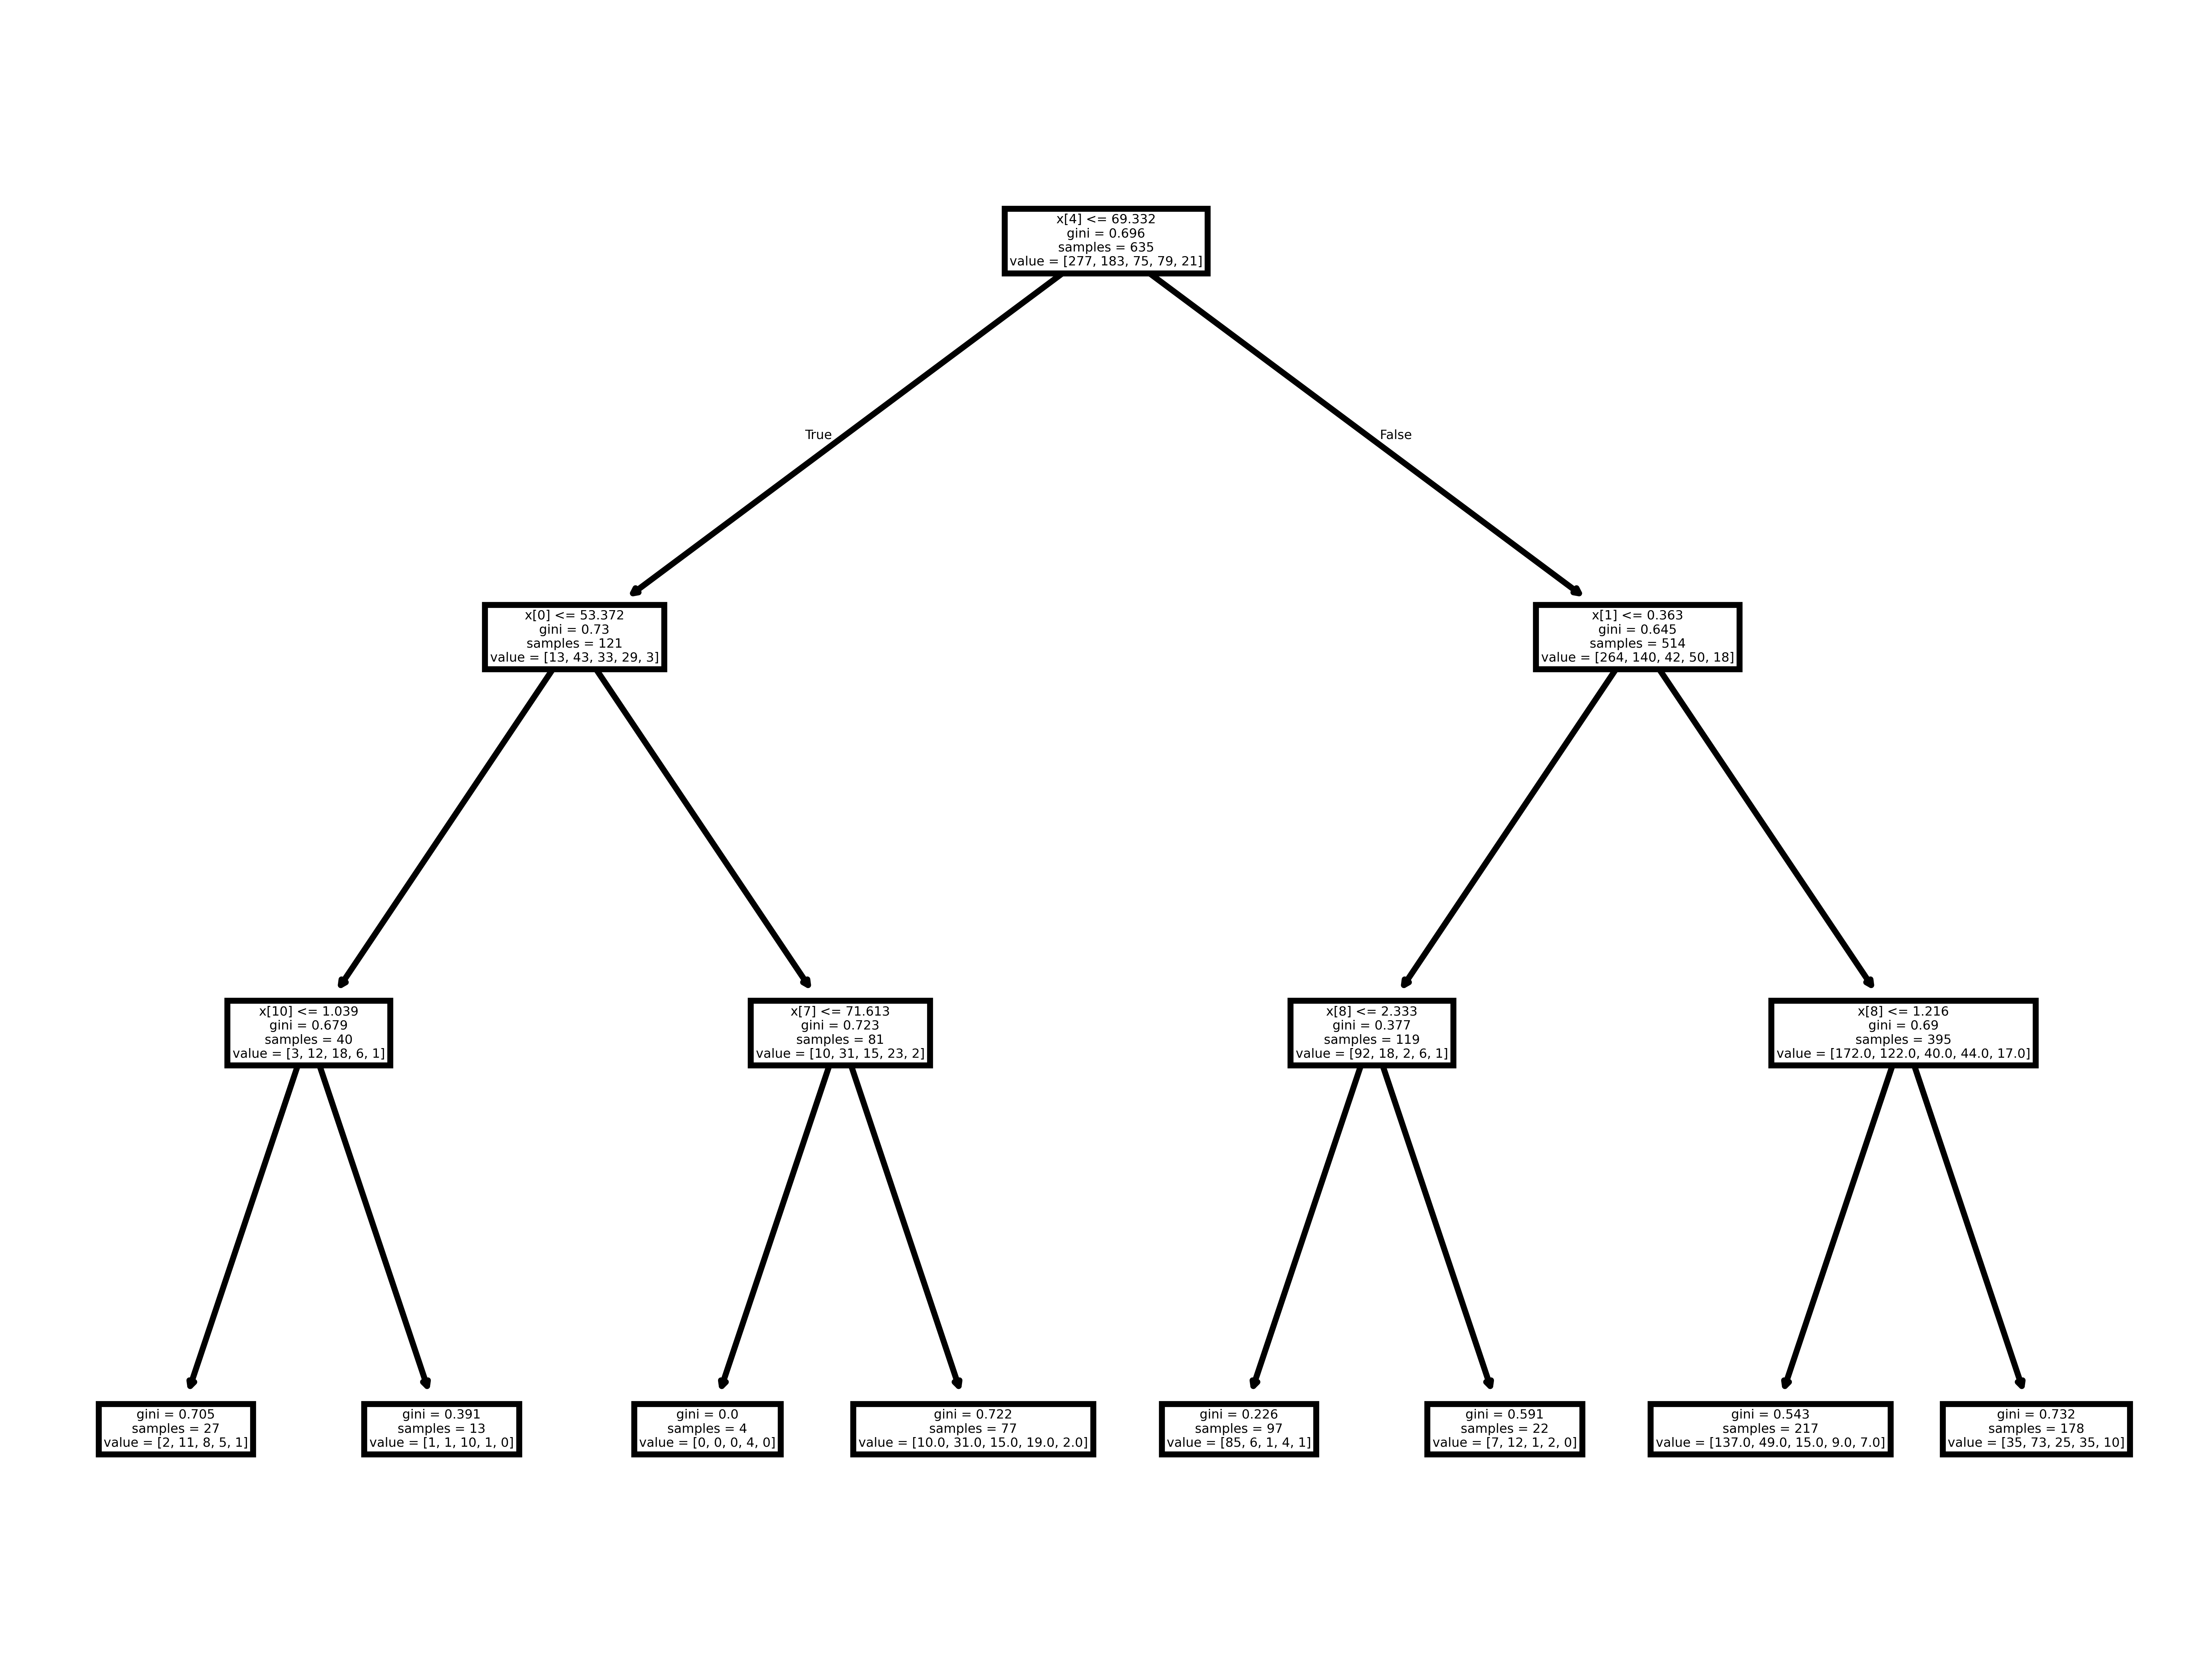

In [22]:
plt.figure(dpi=1200)
tree.plot_tree(model2)
plt.show()

Interview Questions:


1. Common Decision Tree Hyperparameters:

max_depth: Limits tree depth; prevents overfitting by restricting complexity. min_samples_split: Minimum samples to split a node; higher values prevent small splits, reducing overfitting. min_samples_leaf: Minimum samples per leaf; larger leaves reduce overfitting. criterion: Split quality metric (e.g., gini, entropy); affects purity of nodes. max_features: Limits features considered per split; helps prevent overfitting and speeds up training.

2. Label Encoding vs. One-Hot Encoding:

Label Encoding: Assigns each category a unique integer. Best for ordinal data with an inherent order. One-Hot Encoding: Creates binary columns for each category, suited for nominal (unordered) data.